# How Weather Affects Cab Rides

### Driving in Chicago is notoriously congested for the Midwest. There are many reasons for this, from the geography of being located at the bottom of Lake Michigan to the historical development of railroads that go through the city. While we may not be able to change the geography like the weather, better understanding its effect on cab ride durations may allow us to make small changes that translate to large savings across a taxi company's fleet.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#!pip install seaborn
#!pip install matplotlib

In [3]:
#link to project files
url1 = 'https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv'
url2 = 'https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv'
url3 = 'https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv'

#setup data files
df_company = pd.read_csv(url1)
df_locations = pd.read_csv(url2)
df_weather = pd.read_csv(url3)

In [4]:
# display information above company data files
display(df_company.info()) 
display(df_company.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
# display information above location data files
display(df_locations.info())
display(df_locations.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
# display information above weather data files
display(df_weather.info())
display(df_weather.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [7]:
# convert start_ts to datetime
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])

In [8]:
# check for duplicates
duplicates = df_locations.duplicated()
duplicates2 = df_company.duplicated()
duplicates3 = df_weather.duplicated()
# display any duplicate rows
display(df_locations[duplicates])
display(df_company[duplicates2])
display(df_weather[duplicates3])

,dropoff_location_name,average_trips


,company_name,trips_amount


,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [9]:
# drop duplicates
df_weather = df_weather.drop_duplicates() 
# count for any more duplicates
num_duplicates = df_weather.duplicated().sum()
# print number of duplicate rows 
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Most of the work of slicing our data above was already done in SQL, so now it only leaves us to verify the quality. We dropped any duplicate rows from the file containing weather information and converted the start_ts column to datetime.

# Data Visualization 

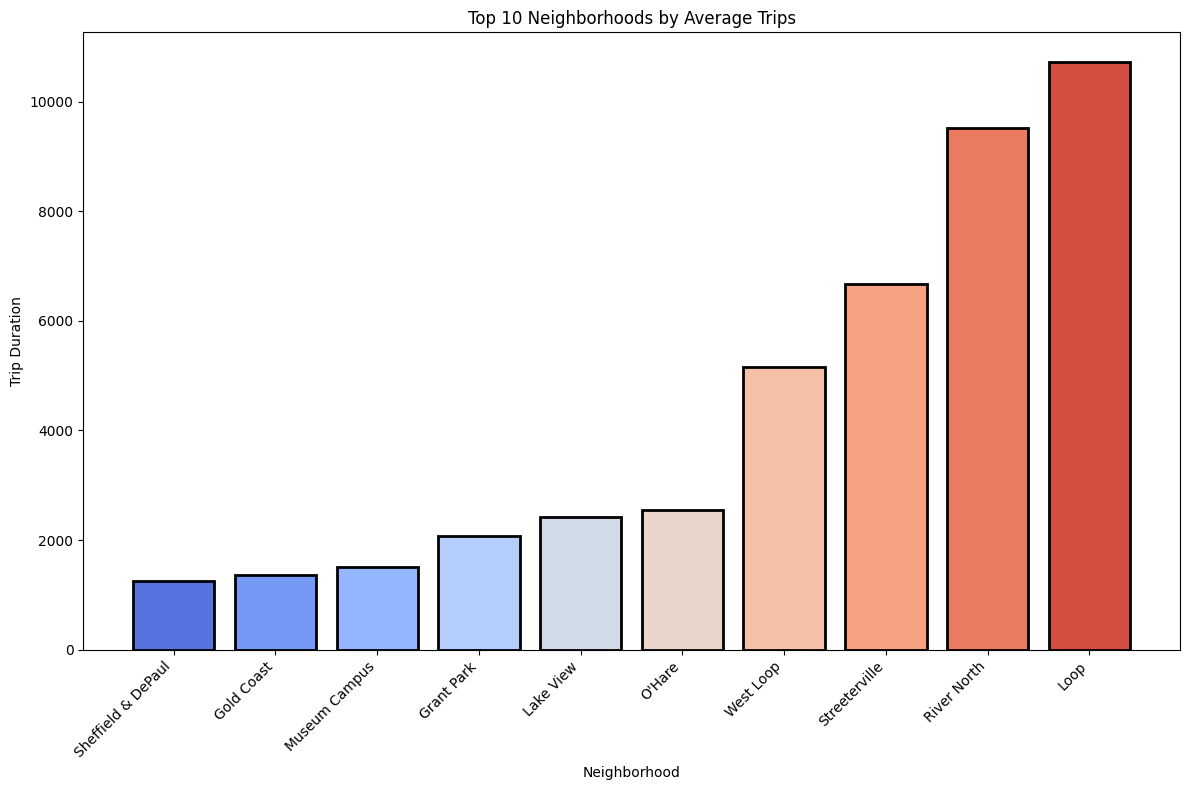

In [10]:
# sort the DataFrame by the average_trips column
sorted_df = df_locations.sort_values(by='average_trips', ascending=False)

#keep only top 10 locations and resort
sorted_df = sorted_df.head(10)
sorted_df = sorted_df.sort_values(by='average_trips', ascending=True)

# plot
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", len(sorted_df))
bars = plt.bar(sorted_df['dropoff_location_name'], sorted_df['average_trips'], color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Neighborhood')
plt.ylabel('Trip Duration')
plt.title('Top 10 Neighborhoods by Average Trips')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


### From the above chart we see the neighborhoods in Chicago with the longest cab rides are also closest to the downtown.  

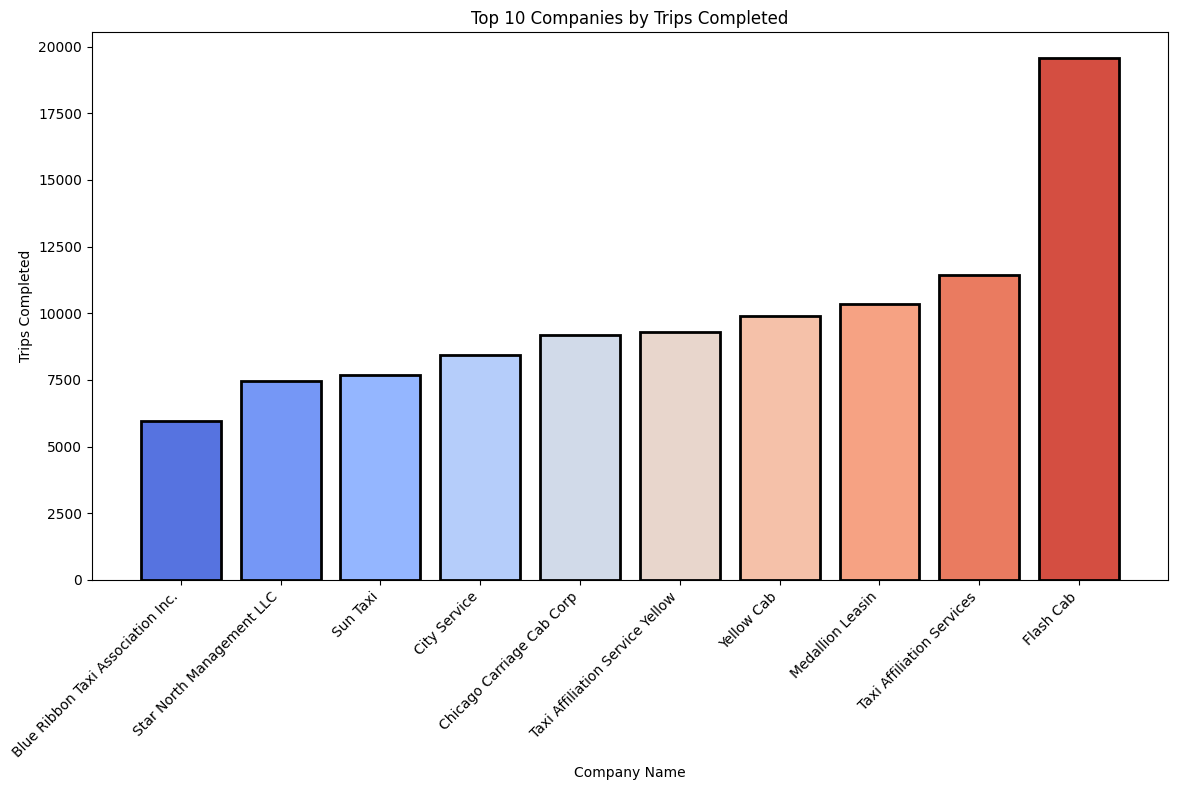

In [14]:
# sort the DataFrame by the trips_amount column
top_10_companies = df_company.sort_values(by='trips_amount', ascending=False).head(10) 
# keep only top 10 companies and resort
top_10_companies_sorted = top_10_companies.sort_values(by='trips_amount', ascending=True)


# plot
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", len(top_10_companies_sorted))
bars = plt.bar(top_10_companies_sorted['company_name'], top_10_companies_sorted['trips_amount'], color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Company Name')
plt.ylabel('Trips Completed')
plt.title('Top 10 Companies by Trips Completed')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

###### Note: Some might reconize these colors for the Bears.  They may not be the best NFL team, but they are the best NFL team Chicago has. 

### Most of our cab companies performed about 6,000 to 11,000 trips on November 15, 2017. One company, Flash Cab, though stands out as the busiest completing almost 20,000 trips during the same timeframe.

# Test Hypothesis

In [12]:
# filter for saturdays
df_weather['day_of_week'] = df_weather['start_ts'].dt.dayofweek
saturdays = df_weather[df_weather['day_of_week'] == 5]

# Group ride durations by weather condition
rainy_saturdays = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']

# Calculate the t-test
results = ttest_ind(rainy_saturdays, non_rainy_saturdays)

# Set alpha
alpha = 0.01

# Print the results
display(f'alpha = {alpha}')
display(f'p-value: {results.pvalue}')
display('Null Hypothesis (H₀): Average duration of rides on rainy Saturdays = Average duration of rides on non-rainy Saturdays')
display('Alternative Hypothesis (H₁): Average duration of rides on rainy Saturdays ≠ Average duration of rides on non-rainy Saturdays')
print("")
if results.pvalue < alpha:
    display("We reject the null hypothesis.")
    display("There is a significant difference in the average duration of rides between rainy and non-rainy Saturdays.")
else:
    display("We can't reject the null hypothesis.")
    display("There is no significant difference in the average duration of rides between rainy and non-rainy Saturdays.")


'alpha = 0.01'

'p-value: 7.397770692813658e-08'

'Null Hypothesis (H₀): Average duration of rides on rainy Saturdays = Average duration of rides on non-rainy Saturdays'

'Alternative Hypothesis (H₁): Average duration of rides on rainy Saturdays ≠ Average duration of rides on non-rainy Saturdays'

'We reject the null hypothesis.'

'There is a significant difference in the average duration of rides between rainy and non-rainy Saturdays.'

### We are comparing two simple values above: the weather (rainy or not rainy) and cab ride duration (longer or shorter). We are doing this comparison on one day out of the year. Given the numerous other variables that might affect ride duration (time of day, sporting events taking place, construction, etc.), we decided to go with a more conservative alpha value of 0.01 to limit the possibility of a Type I error (false positive).

### The above hypothesis testing is an excellent example to show the difference between two things being statistically significant and being able to directly apply what we've learned as true. Much like how correlation does not always mean causation, "we can't reject" as being false isn't the same as being true. Rain does not cause time to speed up or slow down, and it doesn't make vehicles faster or slower; however, it may affect drivers' perceptions, causing them to drive more cautiously. With other sets of data, we could compare other variables: Do flight delays at O'Hare affect duration? Does the NASCAR race downtown Chicago affect cab rides?

### Knowing how factors like the neighborhood and road conditions seem to affect different cab companies' profits (based on ride duration), we can start to apply small changes to offset the additional costs. To increase drivers' confidence in the vehicles they operate, we might place higher standards on vehicle servicing (better wipers and tires). Additionally, we can charge different rates not just based on the neighborhood but also on road conditions. Then, we can verify whether each change has an effect on average trip duration, and the cab companies' total revenue. 